In [51]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

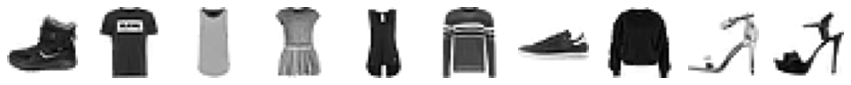

In [52]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (15,15))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [53]:
print([train_target[i] for i in range(10)])
print("0:티셔츠, 1:바지, 2:스웨어, 3:드레스, 4:코트, 5:샌들, 6:셔츠, 7:스니커즈, 8:가방, 9:앵글부츠")

import numpy as np
print(np.unique(train_input, return_counts = True))

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
0:티셔츠, 1:바지, 2:스웨어, 3:드레스, 4:코트, 5:샌들, 6:셔츠, 7:스니커즈, 8:가방, 9:앵글부츠
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 1

In [54]:
#로지스틱  회귀 분석으로 분류

#데이터 전처리
train_scaled = train_input / 255.0 #각 픽셀은 0~255 값 가짐. 이를 0~1의 사이 값으로 변환
test_scaled = test_input / 255.0

train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

print(train_scaled.shape)


(60000, 784)


In [55]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [72]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state=42)
print(train_scaled.shape)
print(val_scaled.shape, val_target.shape)

dense = keras.layers.Dense(10, activation='softmax', input_shape = (784,)) #뉴런 수, 뉴런에 적용할 함수, 입력 데이터의 사이즈
model = keras.Sequential(dense)

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs=5)

(1686, 784)
(422, 784) (422,)
Epoch 1/5
53/53 [==============================] - 1s 1ms/step - loss: 1.3542 - accuracy: 0.5813
Epoch 2/5
53/53 [==============================] - 0s 2ms/step - loss: 0.8652 - accuracy: 0.7141
Epoch 3/5
53/53 [==============================] - 0s 1ms/step - loss: 0.7344 - accuracy: 0.7539
Epoch 4/5
53/53 [==============================] - 0s 1ms/step - loss: 0.6639 - accuracy: 0.7734
Epoch 5/5
53/53 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7871


In [73]:
model.evaluate(val_scaled, val_target)

14/14 [==============================] - 0s 871us/step - loss: 0.6528 - accuracy: 0.7725


[0.6527734398841858, 0.7725118398666382]